# Other Waveshapes

In this section we will examine waveforms other than square and sinusoidal waves.  One of the concepts invoked in this section is AC to DC wave rectification, whereby an AC input signal is 'rectified' into a DC signal;  Which means the current never changes direction, i.e. change signs by having a negative value after having a positive one, or vice versa.  A DC signal does not have a constant value per se, although often times that is the case with DC signals.

## Half-wave Rectification

One type of AC to DC rectification is half-wave rectification, which is when half of an AC signal is blocked, leaving only the non-positive or non-negative part of the signal, implying that the current never changes direction.  One way to realize half-wave rectification is through a circuit with an AC power supply and a diode that allows the current to only flow in one direction.  This is illustrated in the figure below.  

![half-wave-rect](https://www.allaboutcircuits.com/uploads/articles/half-wave-rectitier.jpg)

### Example 1

Suppose that the AC power supply has an amplitude of $15$ volts and frequency of $60\text{Hz}$ and the load has a resistance of $10\text{k}\Omega$.

$$ E :=E(t)= \begin{cases}
15 \text{V} \cdot \sin 120\pi t \quad &\text{if } 0\le t < L \\
0 \quad & \text{if } L\le t < 2L = p
\end{cases}$$

Note that the above repeats indefinitely for all whole mulitples of $L$, the half period of waveform.


$$ R_\text{load} := R = 10^4 \Omega$$

![wave-plot](https://www.allaboutcircuits.com/uploads/articles/half-wave-rectifier-waveforms.jpg)

The blue curve in the above figure is the voltage running accross the circuit and the red curve is what the voltage would be if the input signal was not rectified by the diode.  Note that the red curve was shifted up by $0.4$ volts for visibility;  In reality, it would have the same peak as the blue curve.

The period and half-period are given by:

$$ p = 2L = \frac{1}{f} = \frac{1\text{s}}{60}\approxeq 16.67 \text{ms} = 0.01667 \text{s}$$

$$ L = \frac{1}{2f} = \frac{1}{120} \text{s}$$

In [10]:
p = 1/60
L = p/2

print(f'p = {p*1000:.2f}ms\nL = {L*1000:.2f}ms')

p = 16.67ms
L = 8.33ms


When finding the Fourier coefficients of $E(t)$, the midpoint of each integral is $t=L$.

$$ a_n = 120\text{s} \cdot \int_0^p E(t) \cos 120\pi n t \cdot dt$$

$$ b_n = 120\text{s} \cdot \int_0^p E(t) \sin 120 \pi n t \cdot dt$$

$$ a_0 = \frac{1}{L}\int_0^p E(t) \cdot dt$$

Since, via the first equation of this example, half of each integral is equal to zero.

$$ a_n = 120\text{s} \cdot \int_0^L E(t) \cos 120\pi n t \cdot dt$$

$$ b_n = 120\text{s} \cdot \int_0^L E(t) \sin 120 \pi n t \cdot dt$$

$$ a_0 = \frac{1}{L} \int_0^L E(t) \cdot dt$$

Via the first equation of this example, 

$$ E(t) = 15 \text{V} \cdot \sin 120\pi t$$

throughout the range of the integrals found in the equations that give the Fourier coefficients.

$$ a_0 = \frac{15 \text{V}}{L}\int_0^L\sin \frac{\pi t}{L} \cdot dt$$

$$ a_n = 120\text{s} \cdot \int_0^L 15 \text{V} \cdot \sin 120\pi t \cdot \cos 120\pi n t \cdot dt $$

$$ b_n = 120\text{s} \cdot \int_0^L  15 \text{V} \cdot \sin 120 \pi t \cdot \sin 120 \pi n t \cdot dt$$

First, we will find the mean value, $0.5a_0$.

$$U(t):= \int \sin \frac{\pi t}{L} \cdot dt = - \frac{L}{\pi}\cos \frac{\pi t}{L} + K$$

$$ a_0 = 120 \cdot 15 \cdot \big(U(L) - U(0)\big) $$

$$ U(L) = \frac{L}{\pi}$$

$$U(0) = - \frac{L}{\pi} = -U(L) $$

Thus,
$$ a_0 = 120 \cdot 15 \cdot 2U(L) = 120 \cdot 15 \cdot \frac{2}{120 \pi}$$

$$ a_0 = \frac{30}{\pi}$$

Finally, the mean value -- a.k.a the DC component -- is:

$$ 0.5 a_0 = \frac{15}{\pi}$$

In [11]:
15/np.pi

4.7746482927568605

Next we will find the values of $a_n$, up until some finite index.  We may need to find a specific solution for each value of $a_n$ that we are willing to find.  

Let $\theta$ and $U$ be defined as:

$$ \theta := \theta(t):= 120\pi t = \frac{\pi t}{L}$$

$$ U:= U(\theta)=\int \sin \theta \cdot \cos n \theta \cdot d\theta$$

I do not know of a solution to the above equation that is generalized to all $n \in \mathbb{N}$.

**When $\mathbf{n=1}$,**
$$ U'=U'(\theta) = \sin \theta \cdot \cos \theta = 0.5\sin 2 \theta $$

$$ U = \int U' \cdot d\theta = \int 0.5 \sin 2 \theta \cdot d\theta$$

\begin{align*}
    U(\theta) &= -0.25\cos 2 \theta  + K \\
    U(t)&= - 0.25 \cdot\frac{L}{\pi}\cdot\cos \frac{2\pi t}{L}+ K   
\end{align*}

Thus,

$$ a_1 = 120\text{s} \cdot 15\text{V} \cdot \big(U(L) - U(0)\big) = 0$$

**When $\mathbf{n=2}$,**
$$ U' = \sin \theta \cdot \cos 2 \theta = \sin \theta \cdot (\cos^2\theta - \sin^2\theta)$$

$$ U := \int U'(t) \cdot dt = - \frac{1}{3\theta'(t)}\cos^3\theta - \int \sin^3 \theta \cdot dt$$

To find the other primitive integral, first let $Q$ be defined as:
$$ Q:= - \cos \theta \cdot \sin^2\theta$$


$$ Q' = \theta'(t)\cdot(\sin^3\theta - 2\cos^2\theta \sin \theta)$$

$$ -2\int \cos^2\theta \sin \theta \cdot d\theta =  \frac{2}{3} \cos^3\theta$$

$$ -2\int \cos^2\theta \sin \theta \cdot dt =  \frac{2}{3\theta'(t)} \cos^3\theta$$

Now, let $Q$ be redfined as:
$$ Q(\theta):= - \cos \theta \cdot \sin^2 \theta - \frac{2}{3} \cos^3\theta$$

$$ Q'(\theta) = \sin^3\theta$$

Let $Q$ be redefined yet again as:

$$ Q := - \frac{1}{\theta'(t)} \left(\cos \theta \cdot \sin^2\theta +\frac{2}{3}\cos^3\theta \right)$$

$$ Q'(t) = \sin^3\theta$$

Thus,
$$ Q = \int Q' \cdot dt = \int \sin^3 \theta \cdot dt = - \frac{1}{\theta'(t)} \left(\cos \theta \cdot \sin^2\theta +\frac{2}{3}\cos^3\theta \right)$$

and,
$$ U = \int U' \cdot dt = - \frac{1}{3\theta'(t)}\cos^3\theta - Q =  \frac{1}{\theta'(t)} \left(\cos \theta \cdot \sin^2\theta +\frac{2}{3}\cos^3\theta \right)- \frac{1}{3\theta'(t)}\cos^3\theta$$

Finally,

\begin{align*}
    U &= \frac{1}{\theta'(t)}\left(\cos \theta \cdot \sin^2 \theta  + \frac{1}{3} \cos^3 \theta\right) + K \\
     &= \frac{L}{\pi}\left( \cos\frac{\pi t}{L} \cdot \sin^2 \frac{\pi t}{L}  + \frac{1}{3} \cos^3 \frac{\pi t}{L}\right) + K
\end{align*}

$$a_2 = 120\text{s} \cdot 15\text{V} \cdot \big(U(L)-U(0)\big) = 120\text{s} \cdot 15\text{V} \cdot \frac{L}{\pi} \left(-\frac{1}{3} - \frac{1}{3}\right)$$

$$ a_2 = - 15 \frac{2}{3\pi} = -\frac{10}{\pi}$$

In [12]:
-10/np.pi

-3.183098861837907

**When $\mathbf{n=3}$,**

$$ U' = \sin \theta \cdot \cos 3 \theta = \sin \theta \cdot \cos (\theta + 2\theta)$$

Via equation (4) in the [Trig. Identities](/notebooks/Math/Trigonometry.ipynb#Compound-Angles) chapter,

\begin{align*}
    \cos(\theta + 2\theta) &= \cos \theta \cdot \cos 2\theta - \sin \theta \cdot \sin 2\theta \\
     &= \cos\theta \cdot (\cos ^2 \theta - \sin^2\theta) - 2\sin^2\theta \cdot \cos \theta
\end{align*}

Via the above two equations and substitution,

\begin{align*}
    U' &= \sin \theta \cdot \big(\cos\theta(\cos^2\theta - \sin^2\theta) - 2\sin^2\theta \cdot \cos\theta \big) \\
     &= \sin \theta \cdot (\cos^3\theta - \sin^2\theta \cdot \cos\theta - 2\sin^2\theta \cdot \cos\theta ) \\
     &= \sin \theta \cdot(\cos^3\theta - 3\sin^2\theta \cdot \cos\theta) \\
     &= \sin \theta \cdot \cos^3\theta - 3 \sin^3\theta \cdot \cos \theta
\end{align*}

$$ U := \int U'(\theta) \cdot d\theta = - 0.25 \cos^4\theta - 0.75 \sin^4\theta + K$$

Now, let $U$ be redefined as:

$$ U:=U(t):=\int U'(t)\cdot dt = \frac{1}{\theta'(t)} \cdot \int U'(\theta)\cdot d\theta$$

$$ U = U(t) = K - \frac{L}{4\pi}\left(\cos^4\frac{\pi t}{L} + 3\sin^4\frac{\pi t}{L} \right)$$

Finally,

$$ a_3 = 120\text{s} \cdot 15\text{V} \cdot \big(U(L) - U(0)\big) = 0$$

**Now we find the $b_n$ coefficients.**

While finding the $b_n$ coefficients, let $U$ be redefined as:

$$ U:=U(t):=\int \sin \theta \cdot \sin n \theta \cdot dt$$

**When $\mathbf{n=1}$,**
$$ U'(t) = \sin^2 \theta = 0.5 - 0.5\cos 2 \theta $$

$$ U = \int U'(t) \cdot dt = \int 0.5 \cdot dt - 0.5\int\cos 2 \theta \cdot dt$$

$$ U = 0.5 t - \frac{1}{4\theta'(t)} \sin 2 \theta + K$$

$$ \theta'(t) = \frac{\pi}{L}$$

$$ U = 0.5 t - \frac{L}{4\pi}\sin \frac{2\pi t}{L} + K$$


\begin{align*}
    b_1 &= 120 \text{s} \cdot 15\text{V} \cdot \int_0^L U'(t) \cdot dt \\
     &= 120 \cdot 15 \big(U(L) - U(0)\big) \\
     &= 120 \cdot 15 \cdot (0.5L - 0.5\cdot 0) \\
     &= 60 \cdot 15 L
\end{align*}    

In [13]:
60*15

900

$$b_1 = 900L = \frac{900}{2f} = \frac{900}{120}$$

In [14]:
900/120

7.5

Finally, 
$$b_1 = 7.5$$

**When $\mathbf{n=2}$,**

$$ U'(t) = \sin \theta \cdot \sin 2 \theta = 2\sin^2\theta \cdot \cos \theta$$

$$ U = \int U'(t) \cdot dt = \frac{2}{3\theta'(t)}\sin^3 \theta + K$$

$$ U = \frac{2L}{3\pi} \sin^3 \frac{\pi t}{L} + K$$

$$ b_2 = 120 \cdot 15 \cdot \big(U(L) - U(0)\big)$$

$$ b_2 = 0$$

**When $\mathbf{n=3}$,**

$$ U'(t) = \sin \theta \cdot \sin 3 \theta$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

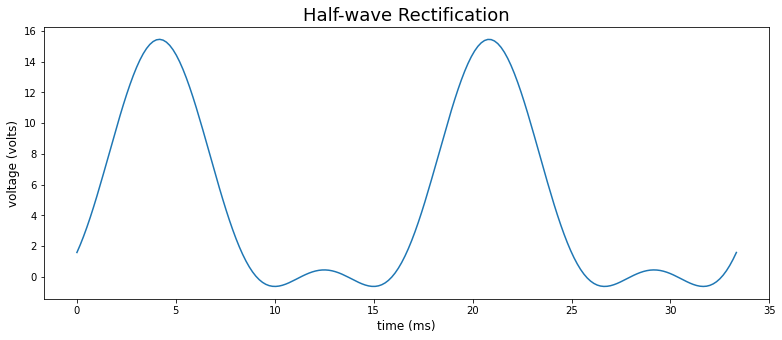

In [2]:
# Fundamental Frequency (in Hertz or Hz)
f = f_1 = 60

# Fundamental Angular Velocity (in radians per second)
w = 120 * np.pi

# The period of the waveform in seconds.
p = 1/f

# The half-period of the waveform in seconds.
L = p/2

""" The mean value -- a.k.a. the dc level or dc component, denoted as 'dc_level' -- of the Fourier Series 
is given by a_0/2. """

a_0 = 30/np.pi
dc_level = a_0/2

""" Throughout this code cell, the n'th harmonic amplitude is denoted as 'C_n'.  I.e. the first or fundamental
harmonic amplitude is denoted as 'C_1'.  The n'th phase shift or phase angle is denoted as 'p_n'. """

C_1, C_2 = 7.5, -10/np.pi

p_1, p_2 = 0, 0.5*np.pi

# Define the time domain, in terms of seconds, of the function (Fourier Series) that will be plotted.
t = np.linspace(0, 2*p, num=200)

# Define the Fourier Series.
f = a_0/2 + C_1*np.sin(w*t) + C_2*np.cos(2*w*t)

# Create the figure and axes that shall contain the plot.
fig, ax = plt.subplots(figsize=(13, 5))

# Set the axes properties.
ax.set_title('Half-wave Rectification', size=18)
ax.set_xlabel('time (ms)', size=12)
ax.set_ylabel('voltage (volts)', size=12)

# Create the plot.
ax.plot(t*1000, f)

Notice how, with only two terms, the Fourier Series, denoted as '`f`' in the code cell above, approximates the desired waveform quite well.  This implies that the first two harmonic amplitudes have the most significance, while the rest have very little.  An external source which performed it's own Fourier analysis on the waveform confirms this prediction. 

# Full-wave Rectification

Another method of AC/DC conversion is called *full-wave* (Figure below), which as you may have guessed utilizes the full cycle of AC power from the source, reversing the polarity of half the AC cycle to get electrons to flow through the load the same direction all the time.

### Example  2

Here is an example of full-wave rectification that uses the same power supply as example 1 in the half-wave section.

![full-wave-circuit](https://www.allaboutcircuits.com/uploads/articles/full-wave-rectifier-circuit.jpg)

And below is a plot of the recticified DC waveform (in blue) and, for the sake of juxtaposition, the unrectified AC waveform (in red).

![full-wave-plot](https://www.allaboutcircuits.com/uploads/articles/waveforms-for-full-wave-rectifier.jpg)

Note that I got this from another website, and they did not say whether the red or blue plot is shifted up or down for the sake of illustration and visibility, but I am certain that the amplitude of both waveforms should be the same (15 volts).

Basically, this fully rectified DC waveform is given by:

$$ E:=E(t)= 15 \text{V} \cdot \begin{cases}
\sin 2\pi f t \quad &\text{if }\hspace{2ex} 0\le t < L \\
-\sin 2\pi f t \quad &\text{if }\hspace{2ex} L\le t < 2L = p
\end{cases}
$$

Here, the frequency ($f$) and period ($p$) of the waveform are the same as they were in the half-wave rectification example.

$$ f = 60\text{Hz}$$

$$ p = 2L = \frac{1}{f} \approxeq 16.67\text{ms}$$

$$ L = \frac{1}{2f} = 0.5p = \frac{1}{120\text{s}} \approxeq 8.33\text{ms}$$

$$ \frac{1}{L} = 120 \text{s}$$

The mean value or **dc component** of the Fourier Series of $E(t)$ is $0.5a_0$, where:

$$ a_0 = \frac{1}{L} \int_0^p E(t) \cdot dt = \frac{2}{L}\int_0^L E(t) \cdot dt$$

And, since   $\hspace{2ex}E(t) = 15 \text{V}\cdot\sin 2\pi f t\hspace{2ex}$ in the range of the intregral of the above equation,

$$ a_0 = \frac{30}{L}\int_0^L \sin 2\pi f t \cdot dt = \frac{30}{L}\int_0^L \sin \frac{\pi t}{L} \cdot dt$$

Let $U(t)$ be defined as:

$$U(t):=\int  \sin 2\pi f t \cdot dt = - \frac{L}{\pi } \cos \frac{\pi t}{L} + K$$

Via the above two equations,

$$ a_0 = \frac{30}{L} \cdot \big(U(L) - U(0)\big) = \frac{30}{L} \cdot \left(\frac{L}{\pi} + \frac{L}{\pi}\right) = \frac{60}{L} \cdot \frac{L}{\pi} = \frac{60}{\pi}$$

Finally, the **dc component** is:

$$ 0.5a_0 = \frac{30}{\pi} \approxeq 9.55$$

In [6]:
a_0 = 60/np.pi
a_0

19.098593171027442

As for the Fourier Coefficients, $a_n$ and $b_n$, where $n \in \mathbb{N}$, via the family of equations (2), in the [Fourier Series](/notebooks/Math/FourierSeries.ipynb) chapter,

$$ a_n = \frac{1}{L}\int_0^p E(t) \cdot \cos \frac{n \pi t}{L} \cdot dt$$

$$ b_n = \frac{1}{L}\int_0^p E(t) \cdot \sin \frac{n \pi t}{L} \cdot dt$$

Here, $t=L$ is the midpoint of the range of the integral instead of $t=0$, which is the case in the aforementioned Fourer Series chapter.

**First, we will find the $a_n$ coefficients.**

The curve given by the integrand, denoted as '$Q$', of the integral found in the identity of $a_n$ is reflectively symmetric about the vertical line given by $t = L$, which is the midpoint of the range of said integral, for all $n\in\mathbb{N}$.  Thus,

$$ a_n = \frac{2}{L}\int_0^L E(t) \cdot \cos \frac{n \pi t}{L} \cdot dt$$

**When $\mathbf{n=1}$,**

$$a_1 = 0$$

The integral in the above equation is equal to zero since the curve given by $Q$ is reflectively symmetric about the time axis and the vertical line given by $t=0.5L$ within the range of the integral, $[0, L]$, which implies that:

$$ \int_0^{0.5L} Q \cdot dt = - \int_{0.5L}^L Q \cdot dt$$

And, of course,
$$ a_1 = \frac{2}{L} \int_0^L Q \cdot dt = \frac{2}{L} \left(\int_0^{0.5L}Q \cdot dt + \int_{0.5L}^L Q \cdot dt \right) = 0$$

**When $\mathbf{n=2}$,**

The curve given by $Q$ is reflectively symmetric about the line given by $t=0.5L$.  Thus,

$$ a_2 = \frac{4}{L}\int_0^{0.5L} E(t) \cdot \cos \frac{2\pi t}{L} \cdot dt = \frac{4}{L}\int_{0.5L}^L E(t) \cdot \cos \frac{2\pi t}{L} \cdot dt$$

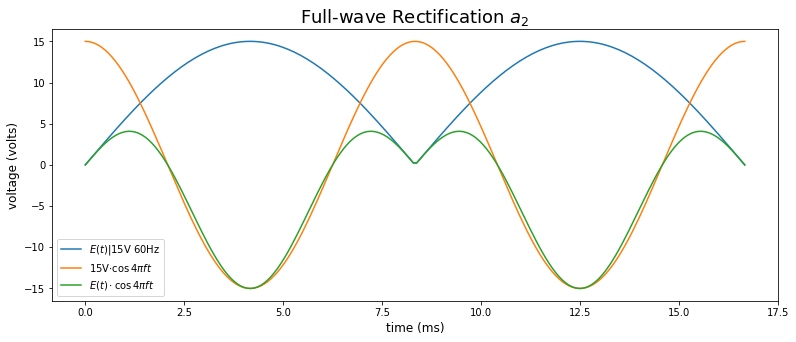

In [3]:
# Fundamental frequency of the rectified waveform.
f = 60

# Set the index of the Fourier coefficient, denoted as 'n'.
n = 2

# Create the time domain for the first period of the fully rectified signal, denoted as 'E'.
t = np.linspace(0, p, num=200)

E_lhs = 15 * np.sin(2*np.pi*f*t[:100])
E_rhs = -15 * np.sin(2*np.pi*f*t[100:])
E = np.array(E_lhs.tolist() + E_rhs.tolist())

y = 15*np.cos(n*2*np.pi*f*t)

# Create the figure and axes.
fig, ax = plt.subplots(figsize=(13,5))

# Set the axes props.
ax.set_title('Full-wave Rectification ' + r'$a_' + str(n) +r'$' , size=18)
ax.set_xlabel('time (ms)', size=12)
ax.set_ylabel('voltage (volts)', size=12)

# Plot the data.
ax.plot(t*1000, E, label=r'$E(t) | 15$V $60$Hz')
ax.plot(t*1000, y, label=r'$15$V$\cdot\cos' + str(n*2) +r'\pi f t$')
ax.plot(t*1000, E*y/15, label=r'$E(t)\cdot\cos' + str(n*2) +  r'\pi f t$')
ax.legend()

Let $\theta$ be defined as:

$$\theta:=\theta(t):=\frac{\pi t}{L} $$

It the follows that:

$$Q = 15\text{V} \cdot \sin \theta \cdot \cos 2\theta$$

Now let $U$ be defined as:

$$ U:= U(t) := \int \sin \theta \cdot \cos 2\theta \cdot dt = \int \sin \theta \cdot(\cos^2\theta - \sin^2\theta)\cdot dt$$

$$ U(t) = \int \sin\theta\cdot\cos^2\theta\cdot dt - \int \sin^3\theta \cdot dt$$

Let's start with the first term from left to right.

$$ U_1:=U_1(t):= \int \sin\theta \cdot \cos^2\theta \cdot dt = -\frac{1}{3\theta'(t)}\cos^3\theta + K_1$$

$$ U_1 = K_1 - \frac{L}{3\pi} \cdot \cos^3\frac{\pi t}{L}$$

And, now we do the second term.

$$U_2:=U_2(t):=\int \sin^3\theta\cdot dt$$

Let $V_1$ be defined as:
$$ V_1 := V_1(t):= - \frac{1}{\theta'(t)} \cos \theta \sin^2\theta$$

$$ V_1'(t) = \sin^3\theta - 2\sin \theta \cos^2\theta$$

Now let $V_2$ be defined as:
$$ V_2 := V_2(t) := 2\cdot\int\sin\theta\cdot\cos^2\theta\cdot dt$$

$$ V_2 = K_2 - \frac{2}{3\theta'(t)}\cos^3\theta$$

It now follows that:
$$ U_2 = V_1 + V_2$$

$$ U_2(t) = K - \frac{L}{\pi}\left( \cos \frac{\pi t}{L} \cdot \sin^2\frac{\pi t}{L} + \frac{2}{3}\cos^3\frac{\pi t}{L}\right)$$

$$ a_2 = \frac{60}{L} \cdot \big(U(0.5L) - U(0)\big) = \frac{60}{L}\big(U(L)-U(0.5L)\big)$$

Via previous equations,
$$ U = U_1 - U_2 = K - \frac{L}{3\pi}\cdot\cos^3\frac{\pi t}{L} + \frac{L}{\pi}\left( \cos \frac{\pi t}{L} \cdot \sin^2\frac{\pi t}{L} + \frac{2}{3}\cos^3\frac{\pi t}{L}\right)$$

$$ U(0.5L) = -\frac{L}{\pi}(0 +0) =K- 0 = K$$
$$ U(0) = K-\frac{L}{3\pi}+\frac{L}{\pi} \cdot \frac{2}{3} = \frac{L}{3\pi} + K$$

Thus,
$$ a_2 = -\frac{60}{L}\cdot\frac{L}{3\pi}= -\frac{20}{\pi}$$

In [4]:
a_2 = -20/np.pi
f_2 = f*2
print(f'f_2 = {f_2:.2f}\na_2 = {a_2:.2f}.')

f_2 = 120.00
a_2 = -6.37.


**When $\mathbf{n=4}$,**

Since, assuming $n$ is even, the curve given by $Q$ is reflectively symmetric about the line given by $t = 0.5L$ within the range $[0,L]$ and $[L,p]$,

$$ a_4 = \frac{4}{L} \cdot \int_0^{0.5L} Q \cdot dt$$

Recall that:
$$ Q = E(t) \cdot \cos \frac{4\pi t}{L} = 15 \text{V}\cdot \sin \frac{\pi t}{L} \cdot \cos \frac{4 \pi t}{L} = 15\text{V} \cdot \sin \theta \cdot \cos 4 \theta$$

Now let $U$ be defined as:

$$ U:=U(t):=\int \sin \theta \cdot \cos 4\theta \cdot dt$$

Via equation (2) in the [Trig Identities](/notebooks/Math/Trigonometry.ipynb) chapter,

$$ \cos 4 \theta = \cos(2 \cdot 2\theta) = \cos^2 2\theta - \sin^2 2\theta$$

Via equation (2) in the aforementioned chapter,

\begin{align*}
    \cos^2 2\theta &= \left(\cos^2 \theta - \sin^2 \theta \right)^2 \\
     &= \cos^4\theta + \sin^4\theta - 2 \cdot \cos^2\theta \cdot \sin^2\theta
\end{align*}     

And, via equation (1) in said chapter,

$$ \sin^2 2\theta = 4 \cdot \sin^2 \theta \cdot \cos^2\theta$$

Via the above 3 equations,

$$ \cos 4 \theta = \cos^4 \theta + \sin^4 \theta - 6\cos^2\theta\cdot\sin^2\theta$$

Thus, 
$$ U = U(t) = \int \sin \theta \cdot \cos^4 \theta \cdot dt  +  \int \sin^5\theta \cdot dt - \int 6 \cdot \cos^2\theta \cdot \sin^3\theta \cdot dt$$

Starting with the first term from left to right:

$$ U_1:=\int \sin \theta \cdot \cos^4 \theta \cdot dt = - \frac{1}{5\theta'(t)}\cdot\cos^5\theta + K_1$$

The second:
$$ U_2:=\int \sin^5\theta \cdot dt = \text{???}$$

Let $V$ be defined as:
$$ V:=V(t):= - \frac{1}{\theta'(t)}\cos \theta \sin^4\theta + V_2(t)+ K_2$$

$$ V'(t) = \sin^5\theta - 4\cos^2\theta\sin^3\theta + V_2'(t)$$

It then follows that:
$$ V_2:=V_2(t)=4\int\cos^2\theta\sin^3\theta\cdot dt$$

$$V_2 = -\frac{4}{3\theta'(t)}\cos^3\theta\sin^2\theta  + V_3(t)$$

$$V_2'(t) = 4\cos^2\theta\sin^3\theta - \frac{8}{3}\cos^4\theta\sin\theta + V_3'(t)$$

It then follows that:
$$ V_3:=V_3(t) = \frac{8}{3}\int\cos^4\theta\sin\theta\cdot dt $$

$$ V_3 = - \frac{8}{15\theta'(t)} \cos^5 \theta$$

Thus,
$$ U_2 = V = -\frac{1}{\theta'(t)}\left(\cos \theta \sin^4\theta + \frac{4}{3}\cos^3\theta\sin^2\theta + \frac{8}{15} \cos^5\theta + K_2 \right)$$

Finally, for the third term of the identity of $U$, via the solution for $V_2$ and dividing throughout by $4$,

$$ \frac{1}{4}V_2 = \int\cos^2\theta\sin^3\theta \cdot dt = -\frac{1}{\theta'(t)}\left( \frac{1}{3}\cos^3\theta\sin^2\theta + \frac{2}{15}\cos^5\theta \right)$$

Thus,
$$ U_3:=6\int\cos^2\theta\sin^3\theta\cdot dt = -\frac{2}{\theta'(t)}\left( \cos^3\theta\sin^2\theta + \frac{2}{5}\cos^5\theta \right) + K_3$$

Now, recall that:
$$ \theta(t) = \frac{\pi t}{L}$$

$$ \theta'(t) = \frac{\pi}{L}$$

It then follows that:

\begin{align*}
    U &= U_1 + U_2 - U_3 \\
     &= K-\frac{L}{\pi}\left(\cos\theta\sin^4\theta-\frac{2}{3}\cos^3\theta\sin\theta - \frac{1}{15}\cos^5\theta  \right)
\end{align*}

where $K\in\mathbb{R}$ is an arbitrary constant that could be, but doesn't need to be, solved for with some initial value or boundary problem.

\begin{align*}
    a_4 &= \frac{4}{L}\int_0^{0.5L}E(t)\cos4\theta \cdot dt \\ \\
     &= \frac{60}{L} \big(U(0.5L) - U(0)\big)
\end{align*}

To ease the computational burden, note that any term in the definition of $U(t)$ with both $\sin\theta$ and $\cos\theta$ as a factor will evaluate to zero when either $0$, $0.5L$, or any whole multiple of $0.5L$ is passed as an argument to $U(t)$.  Let $u(t)$ be defined as:

$$ u(t):= \frac{L}{15\pi}\cos^5\frac{\pi t}{L} $$

It then follows that:

$$ a_4 = \frac{60}{L} \big(u(0.5L) - u(0)\big) = \frac{4}{\pi}\left(\cos^50.5\pi - \cos^5 0\right)$$

Finally,
$$ a_4 = - \frac{4}{\pi}$$

In [5]:
a_4 = -4/np.pi
f_4 = f*4
print(f'a_4 = {a_4:.2f}\nf_4 = {f_4:.2f}')

a_4 = -1.27
f_4 = 240.00


**When $n$ is odd**.

$$ a_n = 0 \quad \text{for all odd } n \text{.}$$

This is because the curve given by $Q$, when $n$ is odd, is reflectively symmetric about the time axis and the vertical line given by $t=0.5L$ within the range of the integral, $[0, L]$, which implies that:

$$ \int_0^{0.5L} Q \cdot dt = - \int_{0.5L}^L Q \cdot dt$$

And, of course, assuming $n$ is odd,
$$ a_n = \frac{2}{L} \int_0^L Q \cdot dt = \frac{2}{L} \left(\int_0^{0.5L}Q \cdot dt + \int_{0.5L}^L Q \cdot dt \right) = 0$$

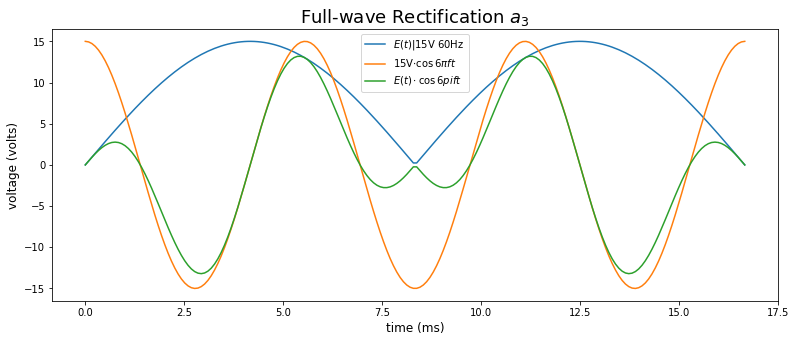

In [35]:
# Define the trig function of the integrand.
n = 3
y = 15*np.cos(n*2*np.pi*f*t)

# Create the figure and axes.
fig, ax = plt.subplots(figsize=(13,5))

# Set the axes props.
ax.set_title('Full-wave Rectification ' + r'$a_' + str(n) + r'$' , size=18)
ax.set_xlabel('time (ms)', size=12)
ax.set_ylabel('voltage (volts)', size=12)

# Plot the data.
ax.plot(t*1000, E, label=r'$E(t) | 15$V $60$Hz')
ax.plot(t*1000, y, label=r'$15$V$\cdot\cos' +  str(n*2)+ r'\pi f t$')
ax.plot(t*1000, E*y/15, label=r'$E(t)\cdot\cos' + str(n*2) + r'pi f t$')
ax.legend()

**Now we will find the $b_n$ coefficients**.

**When $n$ is odd,**

$$b_n = 0 \quad \text{for all odd } n \text{.}$$

This is because, when $n$ is odd, the curve given by the integrand, denoted as '$Q$', of the integral found in the identity of $b_n$ is reflectively symmetric about the vertical line given by $t=L$ and about the time axis within the range of the aforementioned integral, $[0,p]$, implying that:

$$ \int_0^L Q \cdot dt = -\int_L^p Q \cdot dt$$

And, of course, assuming $n$ is odd,

$$ b_n = \frac{1}{L}\int_0^p Q \cdot dt = \frac{1}{L}\left(\int_0^L Q \cdot dt + \int_L^p Q \cdot dt \right) = 0$$

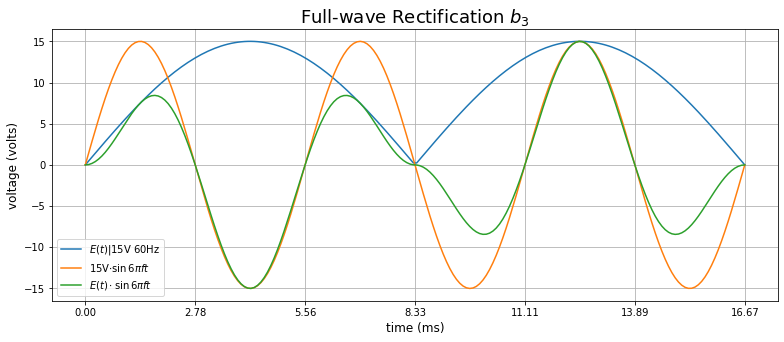

In [28]:
# Define the trig function of the integrand.
y = 15*np.sin(6*np.pi*f*t)

# Create the figure and axes.
fig, ax = plt.subplots(figsize=(13,5))

# Set the axes props.
ax.set_title('Full-wave Rectification ' + r'$b_3$' , size=18)
ax.set_xlabel('time (ms)', size=12)
ax.set_ylabel('voltage (volts)', size=12)
xticks = np.linspace(0.0, p, num=7)*1000
ax.set_xticks(xticks)
ax.grid()

# Plot the data.
ax.plot(t*1000, E, label=r'$E(t) | 15$V $60$Hz')
ax.plot(t*1000, y, label=r'$15$V$\cdot\sin 6\pi f t$')
ax.plot(t*1000, E*y/15, label=r'$E(t)\cdot\sin 6\pi f t$')
ax.legend()

**When $n$ is even.**

Since the curve given by $Q$ is reflectively symmetric around the vertical line given by $t=L$, which is the midpoint of the range of the integral, when $n$ is even,

$$ b_n = \frac{2}{L}\int_0^L E(t) \cdot \sin \frac{n\pi t}{L} \cdot dt\quad\text{for all even } n \text{.}$$

**When $\mathbf{n=2}$,**

Let $\theta$ be defined as:
$$ \theta := \theta(t) := \frac{\pi t}{L}$$

$$b_2 = \frac{30}{L}\cdot\int_0^L \sin \theta \cdot \sin 2 \theta \cdot dt$$

Let $U$ be defined as:

$$U:= U(t) := \int \sin \theta \cdot \sin 2 \theta \cdot dt = 2\int \sin^2\theta \cdot \cos \theta \cdot dt$$

It the follows that:

$$ b_2 = \frac{30}{L}\big(U(L) - U(0)\big)$$

But to find $b_2$ we must first find the primitive integral that defines $U(t)$.

$$ U(t) = \frac{1}{3\theta'(t)} \cdot \sin^3\theta + K$$

$$ \theta'(t) = \frac{\pi}{L}$$

Thus,
$$ U(t) = \frac{L}{3\pi} \cdot \sin^3 \frac{\pi t}{L} + K$$

And now we can find $b_2$.

$$b_2 = \frac{30}{L}(0 - 0) = 0 $$

### Plotting the Fourier Series

Below is a code cell that plots the Fourier Series of $E(t)$.  Note that this only contains the second and fourth harmonic, which are the two most significant ones.

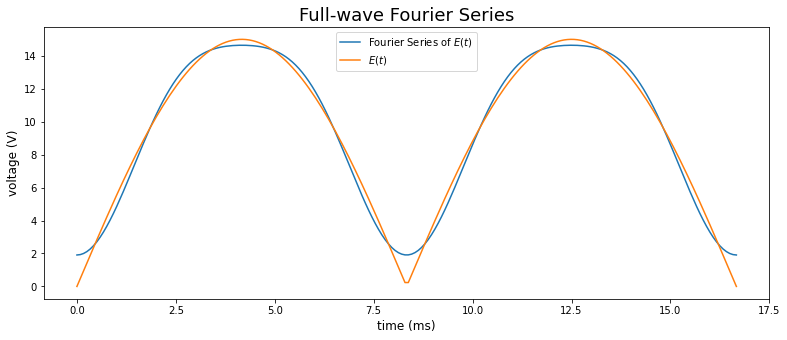

In [8]:
# Define the Fourier Series of 'E', denoted as 'f'.

f = 0.5*a_0 + a_2*np.cos(f_2*2*np.pi*t) + a_4*np.cos(f_4*2*np.pi*t)

# Create the figure and axes.
fig, ax = plt.subplots(figsize=(13,5))

# Set the axes props.
ax.set_title('Full-wave Fourier Series', size=18)
ax.set_xlabel('time (ms)', size=12)
ax.set_ylabel('voltage (V)', size=12)

# Plot the data given by 'f'.
ax.plot(t*1000, f, label=r'Fourier Series of $E(t)$')
ax.plot(t*1000, E, label=r'$E(t)$')
ax.legend()

As one should be able to observe, the Fourier Series of $E(t)$ closely approximates the actual waveform with only the two most significant harmonic terms, the second and fourth.